# EDA analysis (G2M insight for Cab Investment firm )

***Process:***
1. Import data
2. Data manipulation - Create master data, Create new variables, Remove NA, duplicates and perform outlier detection
3. Hypothesis 1
4. Hypothesis 2
5. Hypothesis 3 
6. Hypothesis 4
7. Hypothesis 5
8. Conclusion


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import Data

In [3]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')
customer_id = pd.read_csv('Customer_ID.csv')

### Data Manipulation

In [4]:
#Explore dataset
cab_data.info()

cab_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
#Explore dataset
transaction_id.info()

transaction_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [6]:
#Explore dataset
customer_id.info()

customer_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
#Explore dataset
city.info()

city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


### Duplication and NA values analysis

In [8]:
print("cab_data original dataset:", cab_data.shape)

cab_data.drop_duplicates()
print("cab_data (after removing duplicates):", cab_data.shape)

cab_data.dropna()
print("cab_data (after removing NA):", cab_data.shape)

cab_data original dataset: (359392, 7)
cab_data (after removing duplicates): (359392, 7)
cab_data (after removing NA): (359392, 7)


In [9]:
print("city original dataset:", city.shape)

city.drop_duplicates()
print("city (after removing duplicates):", city.shape)

city.dropna()
print("city (after removing NA):", city.shape)

city original dataset: (20, 3)
city (after removing duplicates): (20, 3)
city (after removing NA): (20, 3)


In [10]:
print("transaction_id original dataset:", transaction_id.shape)

transaction_id.drop_duplicates()
print("transaction_id (after removing duplicates):", transaction_id.shape)

transaction_id.dropna()
print("transaction_id (after removing NA):", transaction_id.shape)

transaction_id original dataset: (440098, 3)
transaction_id (after removing duplicates): (440098, 3)
transaction_id (after removing NA): (440098, 3)


***The is no duplication or NULL values***

### Outlier analysis

Text(0.5, 1.0, 'Price Charged')

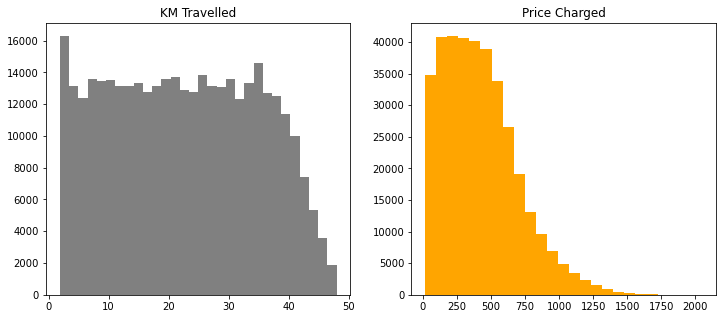

In [11]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(cab_data['KM Travelled'], bins=30, color='grey')
ax1.set_title('KM Travelled')

ax2.hist(cab_data['Price Charged'], bins=25, color='orange')
ax2.set_title('Price Charged')

#There are no obvious outliers from the relevant data

**Transform date format**

In [12]:
cab_data.sort_values(by='Date of Travel', ascending=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1030,10001340,42371,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
489,10000640,42371,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
484,10000635,42371,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
850,10001001,42371,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
160,10000171,42371,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
...,...,...,...,...,...,...,...
355489,10435011,43465,Yellow Cab,MIAMI FL,21.20,319.09,300.1920
354114,10433309,43465,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400
356365,10435915,43465,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888
359162,10439845,43465,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712


In [13]:
#converting Excel serial dates to pandas datetime objects
#Excel series data start from 1899-12-30

cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')

In [14]:
cab_data['Date of Travel'].sort_values(ascending=True)

1030     2016-01-02
489      2016-01-02
484      2016-01-02
850      2016-01-02
160      2016-01-02
            ...    
355489   2018-12-31
354114   2018-12-31
356365   2018-12-31
359162   2018-12-31
358336   2018-12-31
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

## Create Master Data

In [15]:
#Create master date
master_data = (transaction_id.merge(cab_data, how= 'inner')).merge(customer_id, how='inner').merge(city, how= 'inner')
master_data.head(5)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"


In [16]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [17]:
# Convert object columns to numeric types
master_data['Users'] = master_data['Users'].astype(str).str.replace(',', '')
master_data['Population'] = master_data['Population'].astype(str).str.replace(',', '')
master_data['Population'] = pd.to_numeric(master_data['Population'])
master_data['Users'] = pd.to_numeric(master_data['Users'])

# Perform division to create the new column
master_data['Percentage(%) of taxi driver in City'] = master_data['Population'] / master_data['Users']
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Profit per KM'] = master_data['Price Charged'] / master_data['KM Travelled']

In [26]:
master_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Percentage(%) of taxi driver in City,Profit,Profit per KM
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,Male,28,10813,814885,24701,32.990,57.315,12.182
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.190,598.700,317.423,Male,28,10813,814885,24701,32.990,281.277,22.860
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.550,792.050,597.402,Male,28,10813,814885,24701,32.990,194.648,18.615
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,Male,27,9237,814885,24701,32.990,23.666,12.527
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.380,721.100,467.119,Male,27,9237,814885,24701,32.990,253.981,19.821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.400,668.930,525.312,Female,29,6829,418859,127001,3.298,143.618,17.420
359388,10319775,51406,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.570,67.600,44.554,Female,29,6829,418859,127001,3.298,23.046,18.936
359389,10347676,51406,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.460,331.970,337.824,Female,29,6829,418859,127001,3.298,-5.854,14.150
359390,10358624,51406,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.600,358.230,364.320,Female,29,6829,418859,127001,3.298,-6.090,12.979


In [19]:
len(master_data["City"].unique())

19

## Generating Hypothesis 

**Hypothesis 1**

Company
Pink Cab       $5,307,328.32
Yellow Cab    $44,020,373.17
Name: Profit, dtype: object


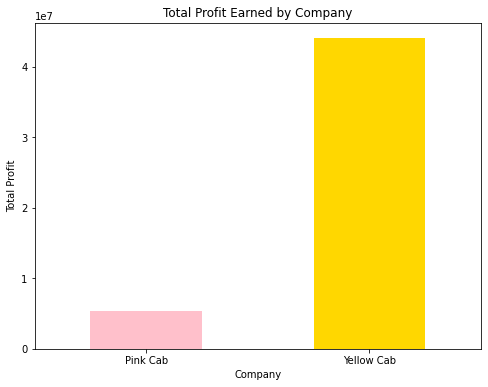

In [58]:
#Hypothesis: One company will have be a bigger market player than another
#Rational: Knowing which company would be a better investment in terms of profit generation
#Outcome: Hypothesis proven to be true. Yellow Cab earned approximately 8.3 times more than Pink Cab 

profit_by_company = master_data.groupby('Company')['Profit'].sum()
formatted_profit = profit_by_company.apply(lambda x: "${:,.2f}".format(x))
print(formatted_profit)


# Plotting the total profit by company
colors = ['blue', 'orange']
profit_by_company.plot(kind='bar', figsize=(8, 6), color=['pink', 'gold'])
plt.title('Total Profit Earned by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.show()

**Hypothesis 2**

Company           Pink Cab   Yellow Cab
City                                   
ATLANTA GA       96050.076   746382.806
AUSTIN TX       147445.290   379255.735
BOSTON MA       262001.698  1506717.572
CHICAGO IL      318722.488  3068590.926
DALLAS TX        24730.112  1104003.153
DENVER CO        40584.939   357000.070
LOS ANGELES CA 1125732.065  3285976.581
MIAMI FL        162301.191   596000.053
NASHVILLE TN     64284.534    85247.684
NEW YORK NY    1511474.388 26451080.771
ORANGE COUNTY   101995.833   355006.041
PHOENIX AZ       35596.394   157344.488
PITTSBURGH PA    17107.738    68058.219
SACRAMENTO CA    55324.012    62002.180
SAN DIEGO CA    637889.769   949273.702
SEATTLE WA      112781.335   491903.518
SILICON VALLEY  340250.531   976454.743
TUCSON AZ        59289.575    80971.120
WASHINGTON DC   193766.353  3299103.809

Table Summary
      Company  Number of Cities with Higher Profit
0  Yellow Cab                                   19
1    Pink Cab                              

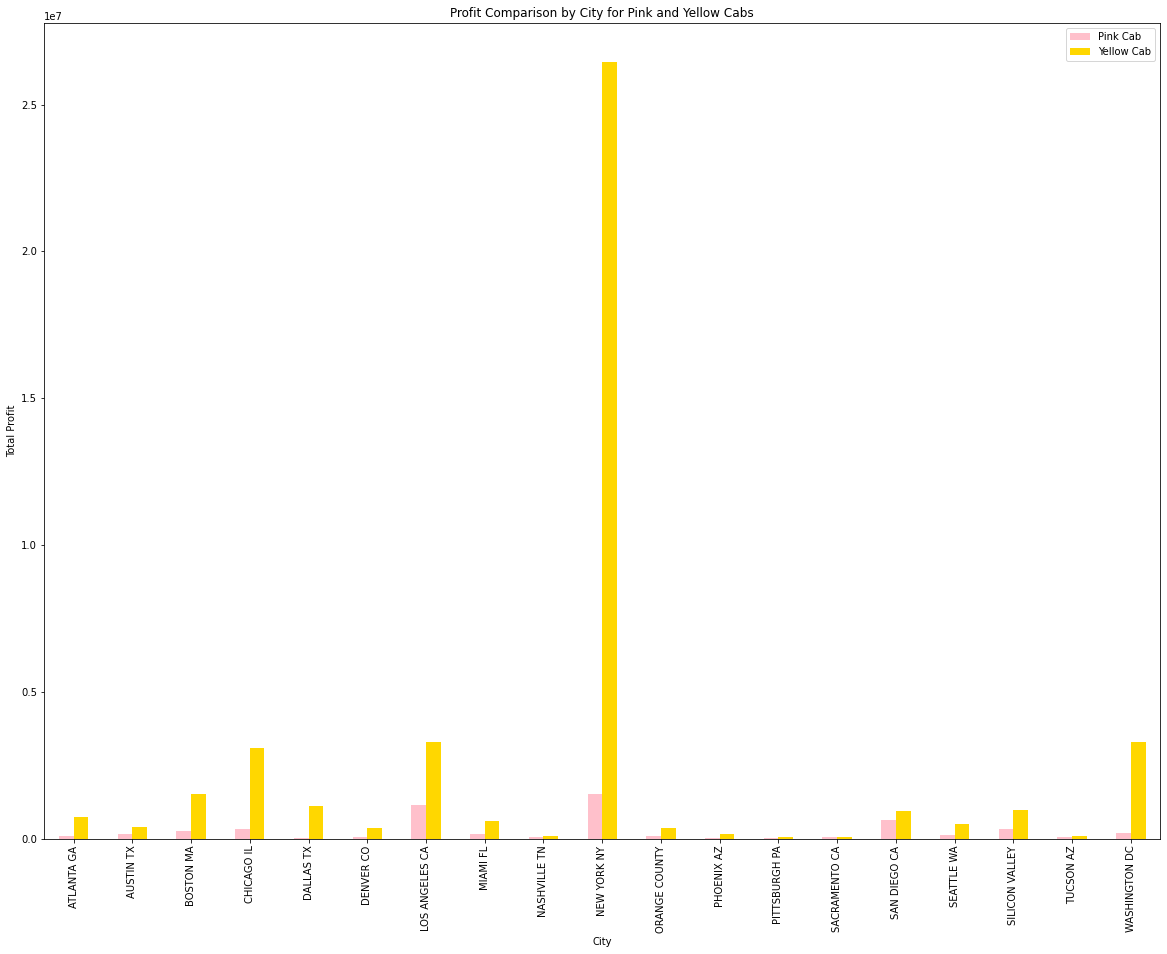

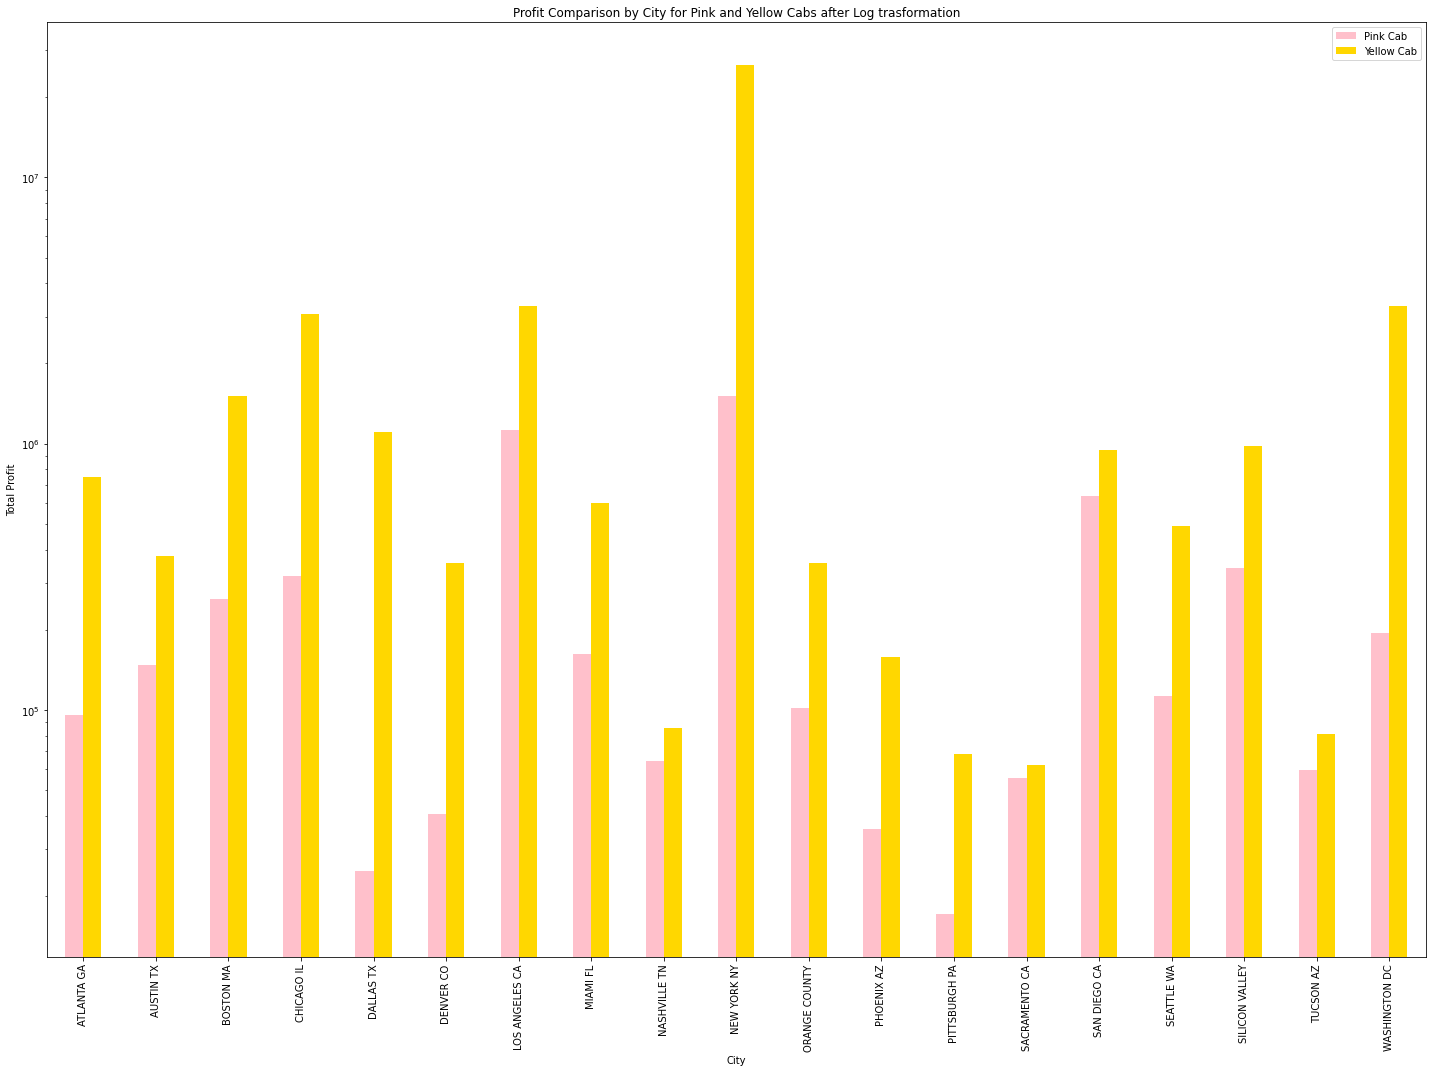

In [57]:
#Hypothesis: Bas=d on the Total Profit Earned Hypothesis result, Yellow cab will have a much bigger market share in every cities compared to pink company
#Rational: Discover if Yellow company has a higher market share than Pink company in all cities
#Outcome: 
#1. The hypothesis is proven to be true, Yellow Cab indeed has the majority market share in all cities. 
#2. Apart from that, New York has been found to have a much bigger market compare to all other cities, which demonstrates the importance New York City

profit_bycity = master_data.groupby(['City', 'Company'])['Profit'].sum().unstack()

print(profit_bycity)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Summary Table
# Calculate counts where each company has higher profits
yellow_better_count = (profit_bycity['Yellow Cab'] > profit_bycity['Pink Cab']).sum()
pink_better_count = (profit_bycity['Pink Cab'] > profit_bycity['Yellow Cab']).sum()

# Create a summary table
summary_table = pd.DataFrame({
    'Company': ['Yellow Cab', 'Pink Cab'],
    'Number of Cities with Higher Profit': [yellow_better_count, pink_better_count]
})

# Display the summary table
print("\nTable Summary")

print(summary_table)

print("\n")

#Create visualization plot
ax1 = profit_bycity.plot(kind='bar', figsize=(20, 15), color=['pink', 'gold'])
ax1.set_title('Profit Comparison by City for Pink and Yellow Cabs')
ax1.set_xlabel('City')
ax1.set_ylabel('Total Profit')
ax1.legend(["Pink Cab", "Yellow Cab"])

ax2 = profit_bycity.plot(kind='bar', figsize=(20, 15), color=['pink', 'gold'])
ax2.set_title('Profit Comparison by City for Pink and Yellow Cabs after Log trasformation')
ax2.set_xlabel('City')
ax2.set_ylabel('Total Profit')
ax2.legend(["Pink Cab", "Yellow Cab"])
# Setting the y-axis to logarithmic scale
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

**Hypothesis 3**

        Transaction ID  Customer ID Payment_Mode  ...  Profit Profit per KM  Year
0             10000011        29290         Card  ...  57.315        12.182  2016
1             10351127        29290         Cash  ... 281.277        22.860  2018
2             10412921        29290         Card  ... 194.648        18.615  2018
3             10000012        27703         Card  ...  23.666        12.527  2016
4             10320494        27703         Card  ... 253.981        19.821  2018
...                ...          ...          ...  ...     ...           ...   ...
359387        10307228        51406         Cash  ... 143.618        17.420  2018
359388        10319775        51406         Cash  ...  23.046        18.936  2018
359389        10347676        51406         Card  ...  -5.854        14.150  2018
359390        10358624        51406         Cash  ...  -6.090        12.979  2018
359391        10370709        51406         Card  ...  25.795        13.233  2018

[359392 rows x 

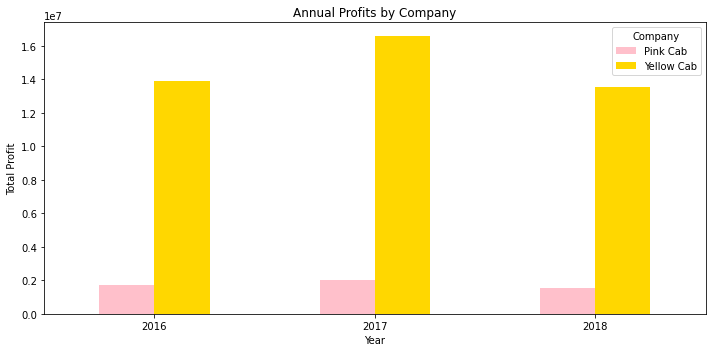

In [56]:
#Hypothesis: Yellow Cab has been growing in the past 3 years
#Rational: The sustainability of the business model should also be a important consideration of the G2M strategy
#Outcome: Hypothesis proven to be false. The cab industry's overall profit increased from 2016 to 2017. However, in 2018, the profit dropped below the level seen in 2016.

hypothesis_3 = master_data.copy()
hypothesis_3['Date of Travel'] = pd.to_datetime(hypothesis_3['Date of Travel'], format='%Y/%m/%d')  # Adjust format as needed

# Extract the year from 'Date of Travel'
hypothesis_3['Year'] = hypothesis_3['Date of Travel'].dt.year

# Display the modified DataFrame
print(hypothesis_3)

# Example of grouping by 'Year' and 'Company' and summing up the profits
annual_profit = hypothesis_3.groupby(['Year', 'Company'])['Profit'].sum().unstack()

# Display the result of the grouped data
print(annual_profit)

print("\n")

annual_profit.plot(kind='bar', figsize=(10, 5), color=['pink', 'gold'])
plt.title('Annual Profits by Company')
plt.ylabel('Total Profit')
plt.xlabel('Year')
plt.xticks(rotation=0)  # Keep the years displayed horizontally
plt.legend(title='Company')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


**Hypothesis 4**


Table Summary
      Company  Number of New Customers  Number of Repeat Customers
0  Yellow Cab                    12031                       27865
1    Pink Cab                    14334                       17996




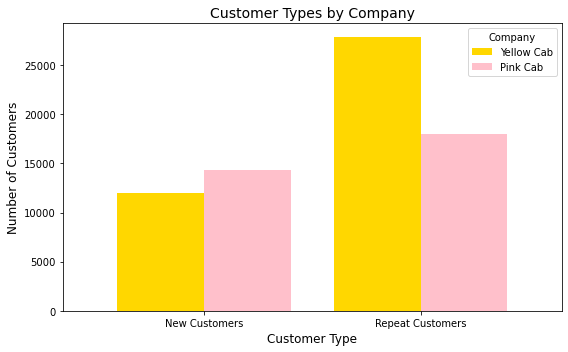

In [55]:
#Hypothesis: Yellow Cab has a more loyal customer base based on previous profit analysis 
#Rational: It is important to understand which company has a greater customer retention rate
#Outcome: Hypothesis proven to be true. Yellow Cab indeed has far more repeat customer, however pink cab has a slightly higher number of new customer 

customer_repeats = master_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Transaction Count')

# Filter to find repeat customers (those who have more than one transaction)
repeat_customers = customer_repeats[customer_repeats['Transaction Count'] > 1].groupby('Company').size()

# Filter to find new customers (those who have exactly one transaction)
new_customers = customer_repeats[customer_repeats['Transaction Count'] == 1].groupby('Company').size()

# Creating a summary DataFrame with the results
summary_table_4 = pd.DataFrame({
    'Company': ['Yellow Cab', 'Pink Cab'],
    'Number of New Customers': [new_customers.get('Yellow Cab', 0), new_customers.get('Pink Cab', 0)],
    'Number of Repeat Customers': [repeat_customers.get('Yellow Cab', 0), repeat_customers.get('Pink Cab', 0)]
})

# Display the summary table
print("\nTable Summary")
print(summary_table_4)
print("\n")

#Visulization
# Plotting
summary_table_4 = pd.DataFrame(summary_table_4)

# Set the index to 'Company' to use in plotting
summary_table_4.set_index('Company', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and an axes object

# Create a bar chart with groups for 'New' and 'Repeat' customers
# Transpose the DataFrame for easier plotting by categories
summary_table_4.T.plot(kind='bar', ax=ax, color=['gold', 'pink'], width=0.8)

# Setting titles and labels
ax.set_title('Customer Types by Company', fontsize=14)
ax.set_xlabel('Customer Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xticklabels(['New Customers', 'Repeat Customers'], rotation=0)  # Set custom x-axis tick labels

# Adding a legend
ax.legend(title='Company')

# Show the plot
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()

**Hypothesis 5**

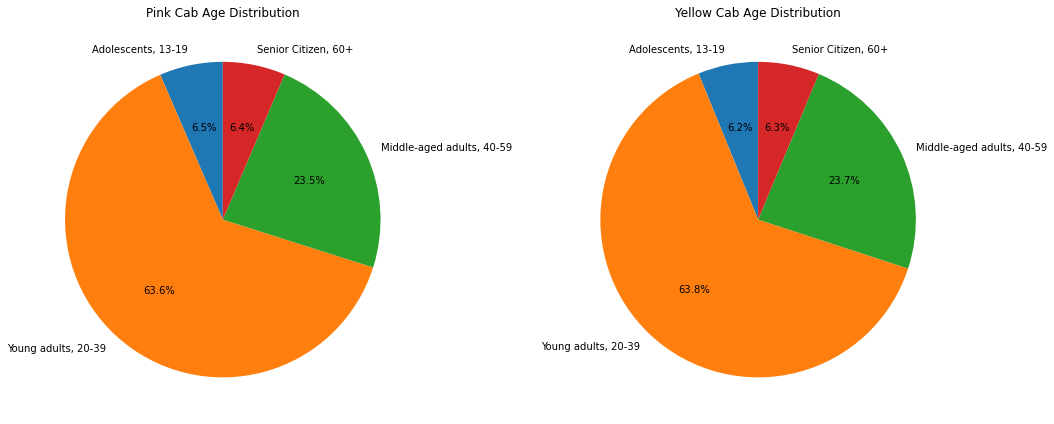

In [67]:
#Hypothesis: Pink Cab has a younger generation demographic due to having a higher number of new customers  
#Rational: Understanding the customer demographic of both companyies
#Outcome: The hypothesis proven to be false, both companies have a very similar customer demographic 

hypothesis_5 = master_data.copy()

# Define age categories
bins = [13, 19, 39, 59, np.inf]  # Using np.inf to include all ages above 59
labels = ['Adolescents, 13-19', 'Young adults, 20-39', 'Middle-aged adults, 40-59', 'Senior Citizen, 60+']

# Categorize age into defined bins
hypothesis_5['Age Category'] = pd.cut(hypothesis_5['Age'], bins=bins, labels=labels, right=True)

# Group by company and age category
demographic_distribution = hypothesis_5.groupby(['Company', 'Age Category']).size().unstack(fill_value=0)

# Plotting each company in a separate pie chart
fig, axes = plt.subplots(1, len(demographic_distribution.index), figsize=(15, 6))
for i, (company, data) in enumerate(demographic_distribution.iterrows()):
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{company} Age Distribution')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


## Final Conclusion

I have primarily focused on the following areas during the analysis:
- profitability
- market share 
- Growth of the company and industry in the past 3 years
- customer retention 
- Customer age demographic


***Investment Decision***

Firstly, investing in Yellow Cab presents a more favorable opportunity for XYZ, as Yellow Cab has a total net profit approximately 8.3 times higher than that of Pink Cab company.

Furthermore, Yellow Cab dominates the market in all cities. This indicates that Yellow Cab holds a significant advantage compare to Pink Cab company, as the taxi industry heavily relies on market share to generate higher profits.


***Industry Analysis***

New York City holds utmost significance in the taxi industry, as the number of transactions that occur there is comparable to the combined total of all other cities. 

Both companies experienced a decline in profits in 2018 following an increase in 2017. 

Furthermore, both companies cater to a similar customer age demographic, suggesting that the industry will continue to witness demand in the future, given that approximately 64% of customers from both companies are young adults.
